In [1]:
from fastai2.tabular.all import *

In [2]:
path = untar_data(URLs.ADULT_SAMPLE)

In [3]:
path.ls()

(#3) [Path('/home/user/.fastai/data/adult_sample/adult.csv'),Path('/home/user/.fastai/data/adult_sample/export.pkl'),Path('/home/user/.fastai/data/adult_sample/models')]

In [4]:
df = pd.read_csv(path/'adult.csv')

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [15]:
q = df.dtypes

In [17]:
q.index

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [30]:
cats = [k for k,v in zip(df.dtypes.index, df.dtypes) 
         if v == np.dtype('object') and k != 'salary']
cats

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [31]:
conts = [k for k,v in zip(df.dtypes.index, df.dtypes) 
         if v != np.dtype('object')]
conts

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [32]:
dls = TabularDataLoaders.from_csv(
                          path/'adult.csv', 
                          path=path, 
                          y_names="salary",
                          cat_names = cats,
                          cont_names=conts,
                          procs = [Categorify, FillMissing, Normalize]
                         )

In [33]:
len(dls.train), len(dls.valid)

(407, 102)

In [35]:
ret = dls.one_batch()

In [36]:
len(ret)

3

In [44]:
len(cats),len(conts)

(9, 6)

In [45]:
len(ret[0][0]), len(ret[1][0]), len(ret[2][0])

(9, 6, 1)

In [46]:
learn = tabular_learner(dls, metrics=accuracy)

In [70]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [47]:
learn

In [48]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 5)
    (5): Embedding(6, 4)
    (6): Embedding(3, 3)
    (7): Embedding(43, 13)
    (8): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(61, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=61, out_features=200, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=200, out_features=100, bias=False)
      (2): ReLU(inplace=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=2, bias=True)
    )
  )
)

In [49]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.331427,0.338965,0.836149,00:10


In [50]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,education-num_na,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,salary_pred
0,8.0,16.0,5.0,14.0,4.0,5.0,1.0,40.0,1.0,-1.289921,-1.445453,-0.035815,-0.145791,-0.214284,-1.665494,0.0,0.0
1,5.0,12.0,1.0,13.0,2.0,5.0,1.0,40.0,1.0,1.064533,-0.728866,-0.427972,0.203693,-0.214284,-0.039134,0.0,0.0
2,5.0,15.0,3.0,11.0,1.0,5.0,2.0,40.0,1.0,-0.186271,-0.040991,1.924969,-0.145791,-0.214284,1.180636,1.0,1.0
3,5.0,10.0,5.0,7.0,4.0,5.0,2.0,40.0,1.0,-0.922038,-1.372594,1.140655,-0.145791,-0.214284,-0.039134,0.0,0.0
4,5.0,13.0,5.0,11.0,2.0,5.0,2.0,40.0,1.0,-0.995614,-0.032833,1.532812,-0.145791,-0.214284,-0.852314,0.0,0.0
5,5.0,11.0,3.0,11.0,1.0,5.0,2.0,40.0,1.0,-0.186271,-0.024101,2.317126,-0.145791,-0.214284,1.587226,1.0,1.0
6,5.0,10.0,4.0,11.0,2.0,5.0,2.0,40.0,1.0,0.328766,0.279013,1.140655,0.301661,-0.214284,-0.039134,0.0,0.0
7,5.0,10.0,5.0,7.0,4.0,5.0,1.0,40.0,1.0,-1.216344,0.217382,1.140655,-0.145791,-0.214284,-2.072084,0.0,0.0
8,5.0,7.0,3.0,4.0,1.0,5.0,2.0,40.0,1.0,-0.848461,-0.699878,-1.996598,-0.145791,-0.214284,-0.689678,0.0,0.0


In [51]:
xa, xb, y = dls.one_batch()

In [56]:
xa.shape, xb.shape, y.shape

(torch.Size([64, 9]), torch.Size([64, 6]), torch.Size([64, 1]))

In [57]:
model = learn.model

In [59]:
yhat = model.forward(xa, xb)

In [63]:
yhat.sum(1).shape

torch.Size([64])

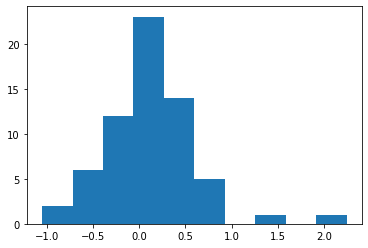

In [65]:
plt.hist(yhat.sum(1).detach());

In [66]:
yhat[:3]

tensor([[ 0.3217, -0.1902],
        [ 2.5706, -2.5875],
        [-0.4889,  1.2055]], grad_fn=<SliceBackward>)